# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [121]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import csv
import numpy as np

# Study data files
mouse_metadata_path = "..\Pymaceuticals\data\Mouse_metadata.csv"
study_results_path = "..\Pymaceuticals\data\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pydatacomplete = pd.merge(mouse_metadata, study_results, how="outer")

# Display the data table for preview
pydatacomplete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [122]:
# Checking the number of mice.
len(pydatacomplete["Mouse ID"].value_counts())


249

In [123]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemice = pydatacomplete.loc[pydatacomplete.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicatemice

array(['g989'], dtype=object)

In [124]:
# Optional: Get all the data for the duplicate mouse ID. 
allduplicates = pydatacomplete.loc[pydatacomplete['Mouse ID'] == 'g989']
allduplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [125]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleandf = pydatacomplete[pydatacomplete['Mouse ID'].isin(duplicatemice)==False]
cleandf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [126]:
# Checking the number of mice in the clean DataFrame.
micetotal = len(cleandf["Mouse ID"].unique())
micetotal


248

## Summary Statistics

In [127]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tvrmean = cleandf.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
tvrmean
tvrmedian = cleandf.groupby(cleandf['Drug Regimen']).median()["Tumor Volume (mm3)"]
tvrmedian
tvrvariance = cleandf.groupby(cleandf['Drug Regimen']).var()["Tumor Volume (mm3)"]
tvrvariance
tvrstd = cleandf.groupby(cleandf['Drug Regimen']).std()["Tumor Volume (mm3)"]
tvrstd
tvrsem = cleandf.groupby(cleandf['Drug Regimen']).sem()["Tumor Volume (mm3)"]
tvrsem

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tvrstatsdf = pd.DataFrame(
    {"Mean Tumor Volume": tvrmean, "Median Tumor Volume": tvrmedian,"Tumor Volume Variance": tvrvariance, "Tumor Volume Std. Dev.": tvrstd, "Tumor Volume Std. Err.": tvrsem})
tvrstatsdf

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [128]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
tvrstatsdf
# Using the aggregation method, produce the same summary statistics in a single line.

groupby1 = cleandf.groupby('Drug Regimen')
statstable2 = groupby1.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
statstable2


C:\Users\kfbie\AppData\Local\Temp\ipykernel_620\719216945.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  statstable2 = groupby1.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

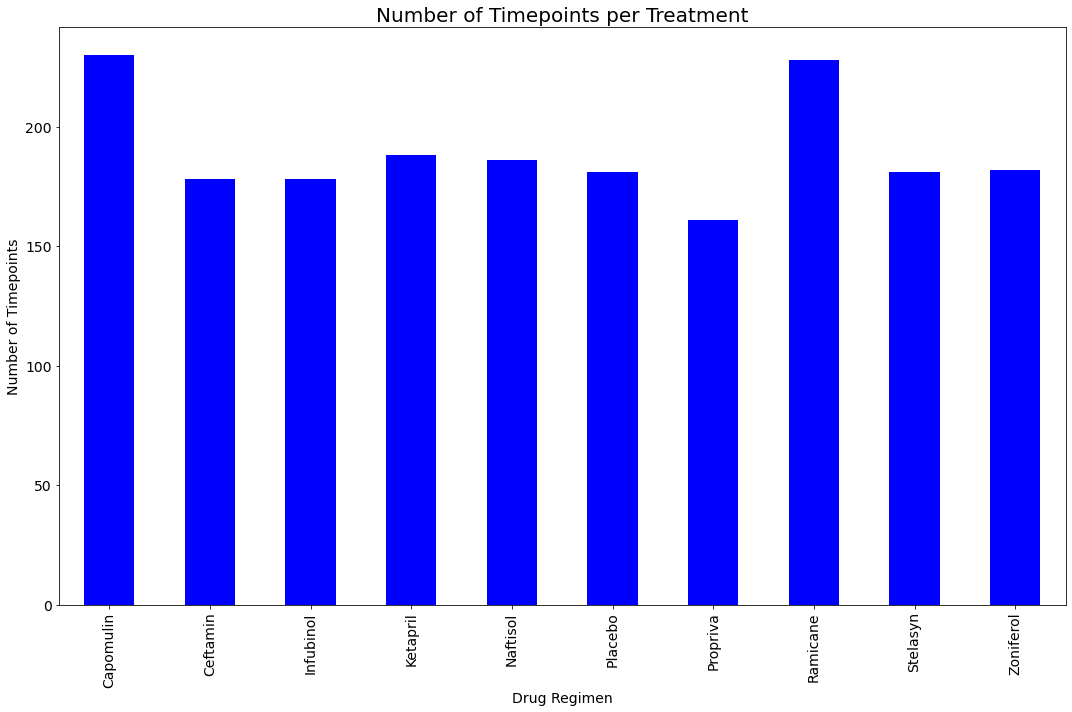

In [129]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

micetestedcount = pydatacomplete.groupby(["Drug Regimen"]).count()["Timepoint"] 
plot = micetestedcount.plot.bar(figsize=(15,10), color='b',fontsize = 14)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Timepoints",fontsize = 14)
plt.title("Number of Timepoints per Treatment",fontsize = 20)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Timepoints')

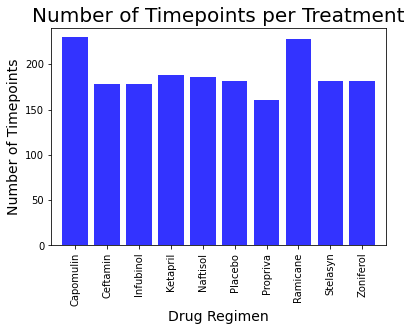

In [130]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

tplist =(pydatacomplete.groupby(["Drug Regimen"])["Timepoint"].count()).tolist()
tplist
x_axis = np.arange(len(micetestedcount))
plt.bar(x_axis, tplist, color='b', alpha=0.8, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(tplist)+10)
plt.title("Number of Timepoints per Treatment",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Timepoints",fontsize = 14)


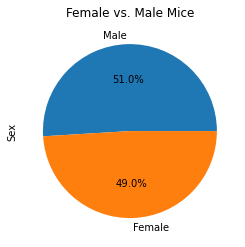

In [131]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

genderpie = cleandf["Sex"].value_counts()
plt.title("Female vs. Male Mice")
genderpie.plot.pie(autopct= "%1.1f%%")
plt.show()

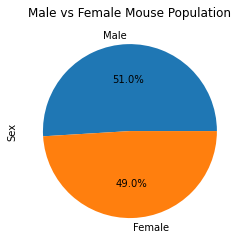

In [132]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
sizes = [49.7999197, 50.200803]
plot = genderpie.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [133]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

capomulindf = cleandf.loc[cleandf["Drug Regimen"] == "Capomulin",:]
ramicanedf = cleandf.loc[cleandf["Drug Regimen"] == "Ramicane", :]
infubinoldf = cleandf.loc[cleandf["Drug Regimen"] == "Infubinol", :]
ceftamindf = cleandf.loc[cleandf["Drug Regimen"] == "Ceftamin", :]

#Capomulin
capomulintplast = capomulindf.groupby('Mouse ID').max()['Timepoint']
capomulinvolume = pd.DataFrame(capomulintplast)
capomulinmerge = pd.merge(capomulinvolume, cleandf, on=("Mouse ID","Timepoint"),how="left")
capomulinmerge.head()
capomulintumors = capomulinmerge["Tumor Volume (mm3)"]
capomulinquartiles =capomulintumors.quantile([.25,.5,.75])
capomulinlowerq = capomulinquartiles[0.25]
capomulinupperq = capomulinquartiles[0.75]
capomuliniqr = capomulinupperq-capomulinlowerq
capomulinlower_bound = capomulinlowerq - (1.5*capomuliniqr)
capomulinupper_bound = capomulinupperq + (1.5*capomuliniqr)

print(f"The lower quartile of Capomulin tumors: {capomulinlowerq}")
print(f"The upper quartile of Capomulin tumors: {capomulinupperq}")
print(f"The interquartile range of Capomulin tumors: {capomuliniqr}")
print(f"The median of Capomulin tumors: {capomulinquartiles[0.5]} ")
print(f"Values below {capomulinlower_bound} could be outliers.")
print(f"Values above {capomulinupper_bound} could be outliers." + "\n")

#Ramicane
ramicanetplast = ramicanedf.groupby('Mouse ID').max()['Timepoint']
ramicanevolume = pd.DataFrame(ramicanetplast)
ramicanemerge = pd.merge(ramicanevolume, cleandf, on=("Mouse ID","Timepoint"),how="left")
ramicanemerge.head()
ramicanetumors = ramicanemerge["Tumor Volume (mm3)"]
ramicanequartiles =ramicanetumors.quantile([.25,.5,.75])
ramicanelowerq = ramicanequartiles[0.25]
ramicaneupperq = ramicanequartiles[0.75]
ramicaneiqr = ramicaneupperq-ramicanelowerq
ramicanelower_bound = ramicanelowerq - (1.5*ramicaneiqr)
ramicaneupper_bound = ramicaneupperq + (1.5*ramicaneiqr)

print(f"The lower quartile of Ramicane tumors: {ramicanelowerq}")
print(f"The upper quartile of Ramicane tumors: {ramicaneupperq}")
print(f"The interquartile range of Ramicane tumors: {ramicaneiqr}")
print(f"The median of Ramicane tumors: {ramicanequartiles[0.5]} ")
print(f"Values below {ramicanelower_bound} could be outliers.")
print(f"Values above {ramicaneupper_bound} could be outliers." + "\n")

#Infubino
infubinoltplast = infubinoldf.groupby('Mouse ID').max()['Timepoint']
infubinolvolume = pd.DataFrame(infubinoltplast)
infubinolmerge = pd.merge(infubinolvolume, cleandf, on=("Mouse ID","Timepoint"),how="left")
infubinolmerge.head()
infubinoltumors = infubinolmerge["Tumor Volume (mm3)"]
infubinolquartiles =infubinoltumors.quantile([.25,.5,.75])
infubinollowerq = infubinolquartiles[0.25]
infubinolupperq = infubinolquartiles[0.75]
infubinoliqr = infubinolupperq-infubinollowerq
infubinollower_bound = infubinollowerq - (1.5*infubinoliqr)
infubinolupper_bound = infubinolupperq + (1.5*infubinoliqr)

print(f"The lower quartile of Infubinol tumors: {infubinollowerq}")
print(f"The upper quartile of Infubinol tumors: {infubinolupperq}")
print(f"The interquartile range of Infubinol tumors: {infubinoliqr}")
print(f"The median of Infubinol tumors: {infubinolquartiles[0.5]} ")
print(f"Values below {infubinollower_bound} could be outliers.")
print(f"Values above {infubinolupper_bound} could be outliers." + "\n")

#Ceftamin
ceftamintplast = ceftamindf.groupby('Mouse ID').max()['Timepoint']
ceftaminvolume = pd.DataFrame(ceftamintplast)
ceftaminmerge = pd.merge(ceftaminvolume, cleandf, on=("Mouse ID","Timepoint"),how="left")
ceftaminmerge.head()
ceftamintumors = ceftaminmerge["Tumor Volume (mm3)"]
ceftaminquartiles =ceftamintumors.quantile([.25,.5,.75])
ceftaminlowerq = ceftaminquartiles[0.25]
ceftaminupperq = ceftaminquartiles[0.75]
ceftaminiqr = ceftaminupperq-ceftaminlowerq
ceftaminlower_bound = ceftaminlowerq - (1.5*ceftaminiqr)
ceftaminupper_bound = ceftaminupperq + (1.5*ceftaminiqr)

print(f"The lower quartile of Ceftamin tumors: {ceftaminlowerq}")
print(f"The upper quartile of Ceftamin tumors: {ceftaminupperq}")
print(f"The interquartile range of Ceftamin tumors: {ceftaminiqr}")
print(f"The median of Ceftamin tumors: {ceftaminquartiles[0.5]} ")
print(f"Values below {ceftaminlower_bound} could be outliers.")
print(f"Values above {ceftaminupper_bound} could be outliers." + "\n")

druglist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = pydatacomplete[pydatacomplete["Drug Regimen"].isin(druglist)]
drugs.head()
lasttp = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
lasttp = lasttp.stack(level=0).unstack(level=0)
for drug in druglist:
    print(drug)

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceft

In [134]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
caplist = []
ramlist = []
inflist = []
ceflist = []
lasttm = cleandf.groupby(['Mouse ID'])['Timepoint'].max()
lasttmdf = pd.DataFrame(lasttm)
lastdf = pd.merge(cleandf, lasttmdf, on=('Mouse ID', 'Timepoint'), how='right')
lastdf

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#done in prior section
    
 # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in lastdf.iterrows():
    if row["Drug Regimen"] == treatments[0]:
        caplist.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        ramlist.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        inflist.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        ceflist.append(row['Tumor Volume (mm3)'])  
    
 # add subset 
drugdf = pd.DataFrame({treatments[0]: caplist,
                       treatments[1]: ramlist,
                       treatments[2]: inflist,
                       treatments[3]: ceflist
                       })
    
# Determine outliers using upper and lower bounds

drugdfmax = drugdf.max()
drugdfmin = drugdf.min()
drugdf

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


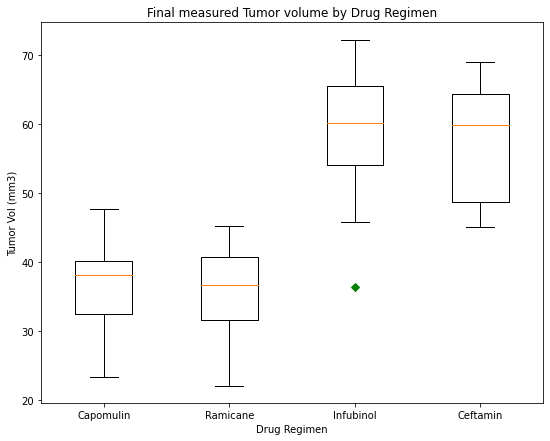

In [135]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

boxplot_list = [drugdf[treatments[0]],
                drugdf[treatments[1]],
                drugdf[treatments[2]],
                drugdf[treatments[3]]
               ]
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list, 0, 'gD')
plt.xticks([1,2,3,4], treatments)
plt.show()


## Line and Scatter Plots

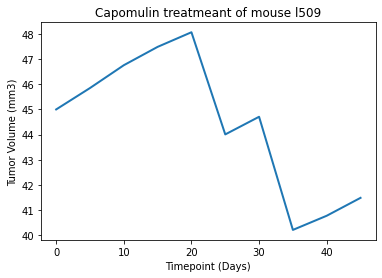

In [136]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
linedf = cleandf.loc[cleandf["Mouse ID"] == "l509",:]
linedf
x_axisTP = linedf["Timepoint"] 
tumorsize = linedf["Tumor Volume (mm3)"] 
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTP, tumorsize,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


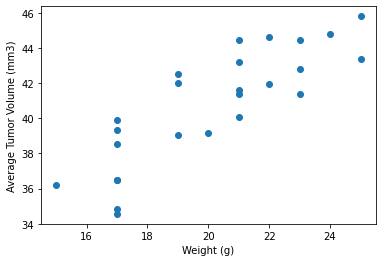

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


In [137]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulindf = cleandf.loc[cleandf["Drug Regimen"] == "Capomulin",:]
capomulinmean = capomulindf.groupby(['Mouse ID']).mean()
plt.scatter(capomulinmean['Weight (g)'],capomulinmean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
capomulinmean


## Correlation and Regression

In [138]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlationco=round(st.pearsonr(capomulinmean['Weight (g)'],capomulinmean['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlationco}")
lrmodel=st.linregress(capomulinmean['Weight (g)'],capomulinmean['Tumor Volume (mm3)'])
lrmodel


The correlation between mouse weight and average tumor volume is 0.84


LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)